In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


EDA

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

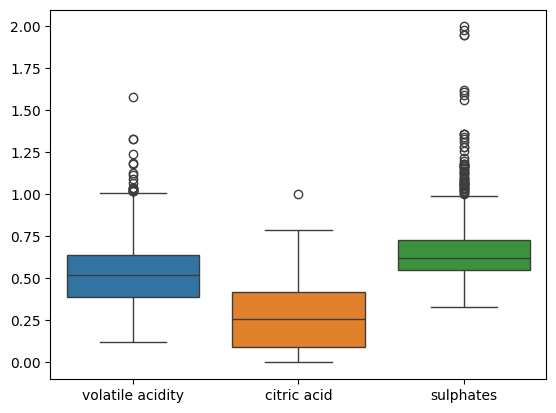

In [10]:
sns.boxplot(df[['volatile acidity', 'citric acid', 'sulphates']])
# Doing boxplots for characteristics with similar attributes

<Axes: >

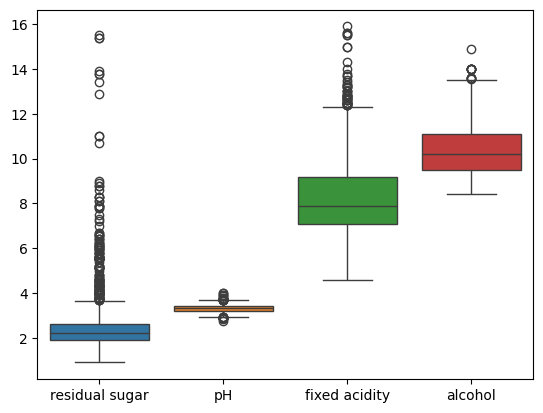

In [12]:
sns.boxplot(df[['residual sugar', 'pH', 'fixed acidity', 'alcohol']])

<Axes: >

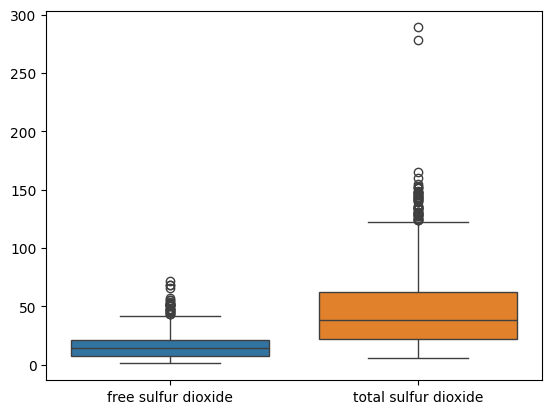

In [13]:
sns.boxplot(df[['free sulfur dioxide', 'total sulfur dioxide']])

In [15]:
# There are data points that are anomalies, including sulphates, residual sugar, fixed acidity, total sulfur dioxide

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df['quality'].value_counts().sort_index()
# To keep in mind the lower and higher end of quality is low in data points so could be inaccurate

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

<Axes: >

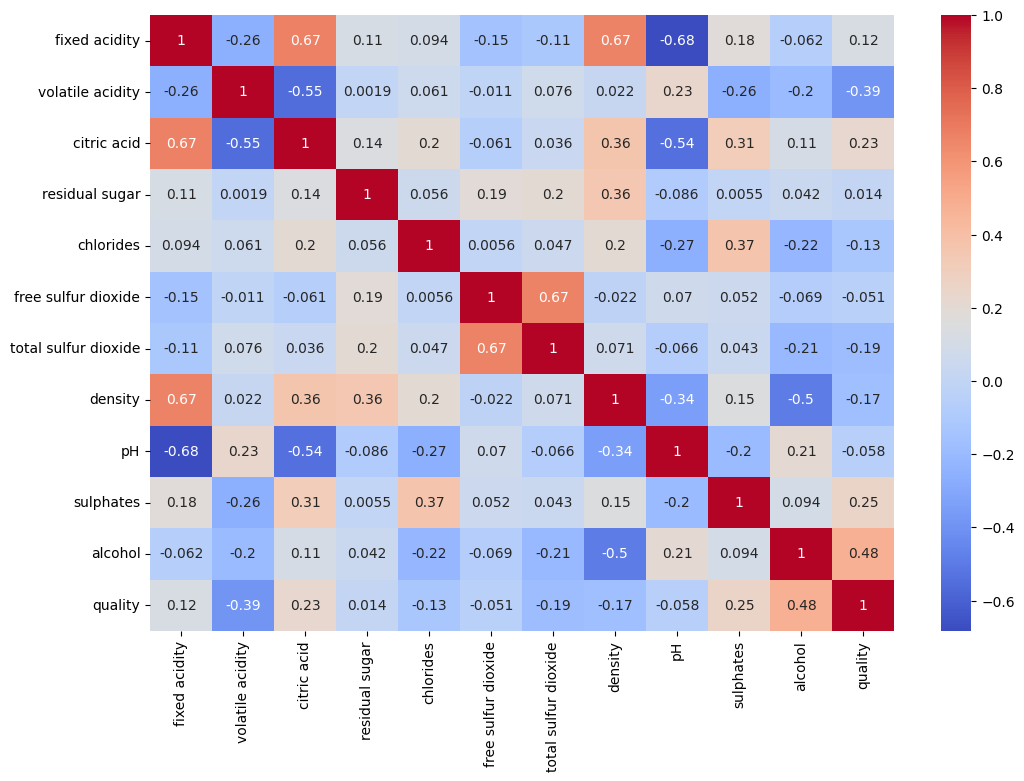

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [27]:
# To feature engineer anything above 0.6 - fixed acidity vs pH and density

In [34]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

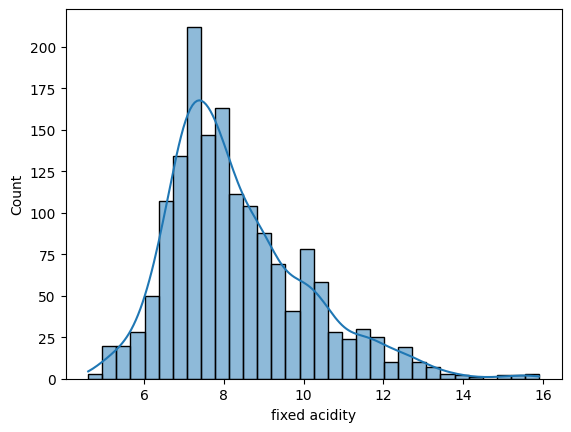

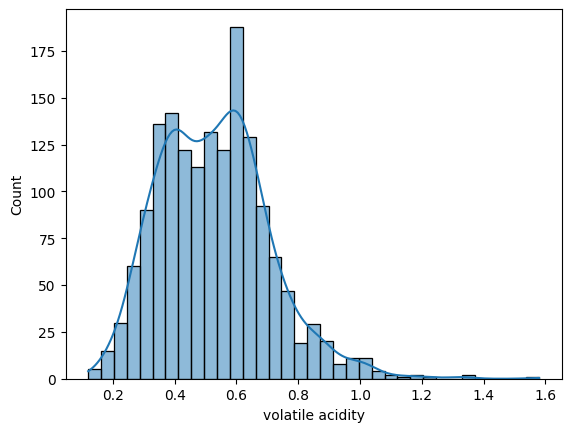

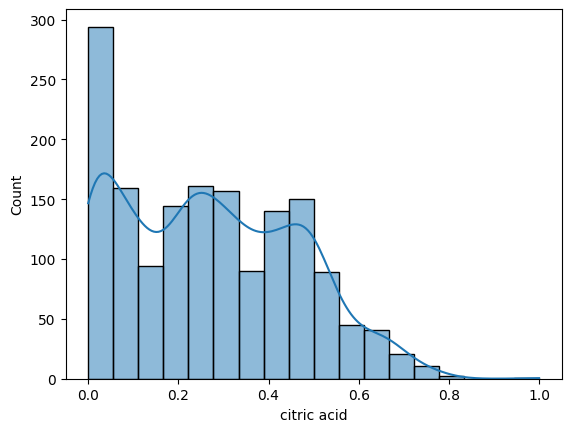

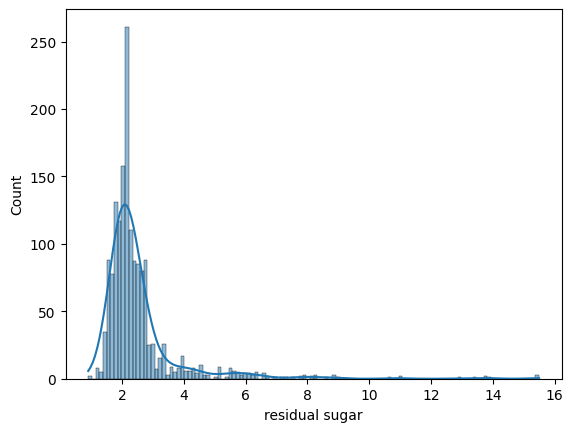

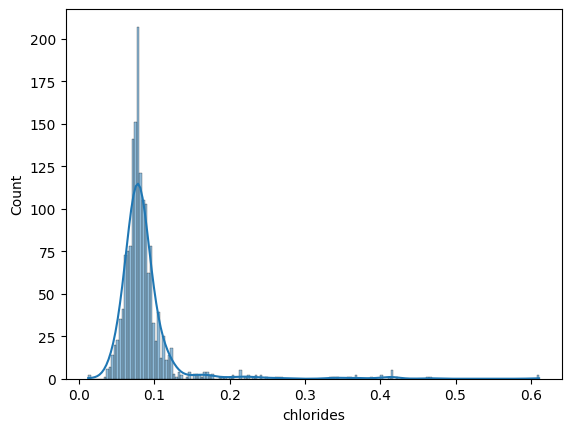

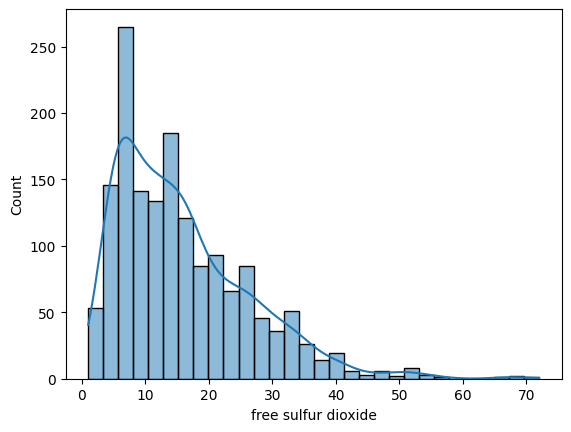

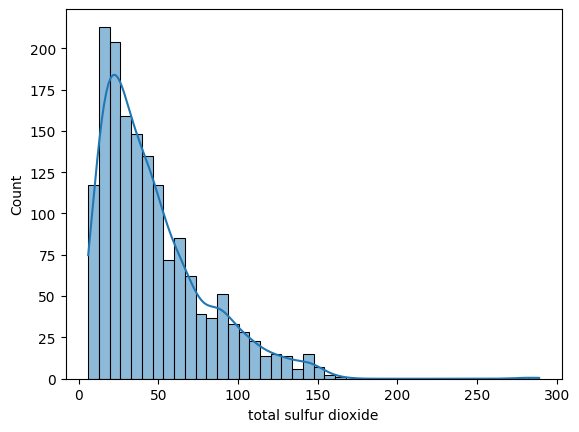

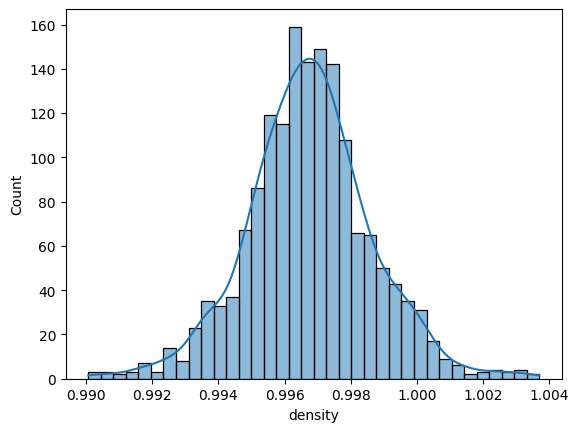

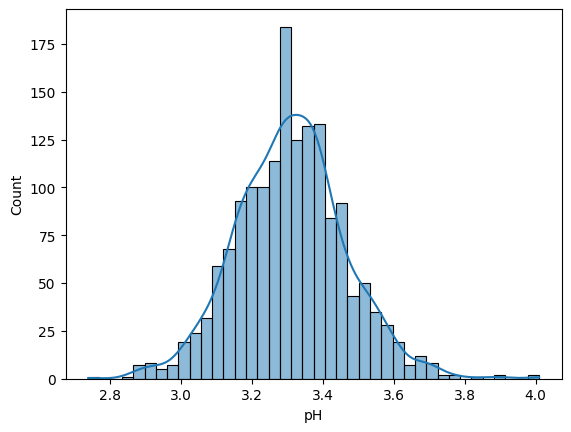

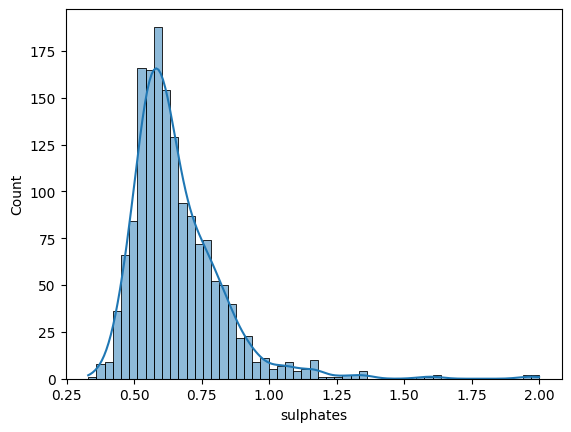

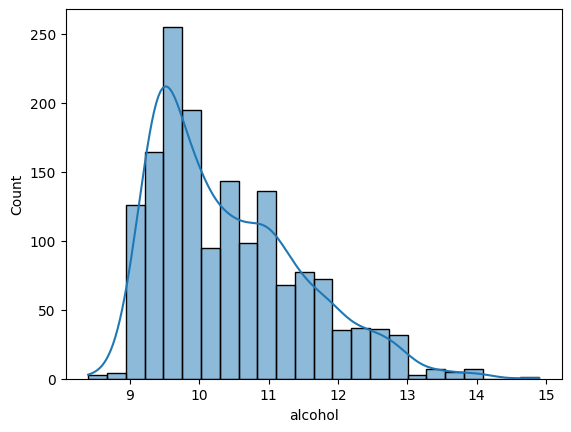

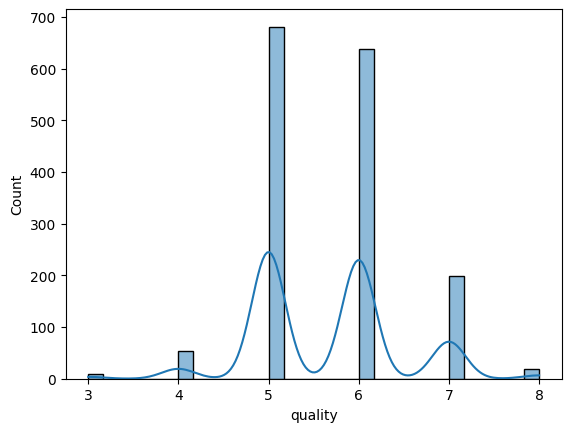

In [36]:
for d in df.columns:
    sns.histplot(df[d], kde=True)
    plt.show()

In [37]:
# Residual sugars and Chloride seem to definitely be heavily skewed to the right and log transformation should help 

In [40]:
# Looking at the correlation map, there seems to be a few interactions between features that are decently correlated.
# They will be looked at through scatter with quality to see if any interactions for feature engineering 
# Basically, looking for patterns to suggest that the relationship between a feature and the target depends on the level of another feature

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

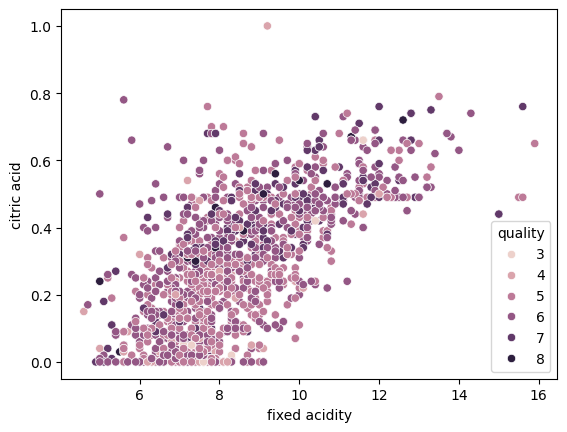

In [42]:
sns.scatterplot(data=df[['fixed acidity', 'citric acid', 'quality']], x='fixed acidity',y= 'citric acid', hue='quality')

<Axes: xlabel='fixed acidity', ylabel='density'>

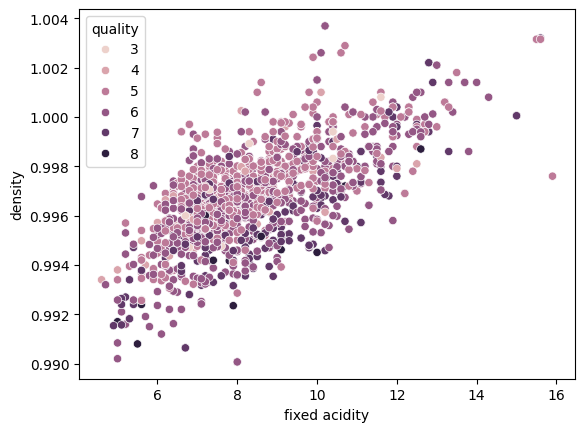

In [43]:
sns.scatterplot(data=df[['fixed acidity', 'density', 'quality']], x='fixed acidity',y= 'density', hue='quality')

<Axes: xlabel='fixed acidity', ylabel='pH'>

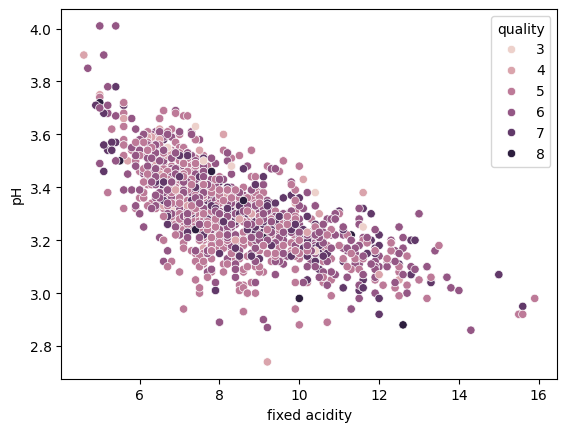

In [46]:
sns.scatterplot(data=df[['fixed acidity', 'pH', 'quality']], x='fixed acidity',y= 'pH', hue='quality')

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

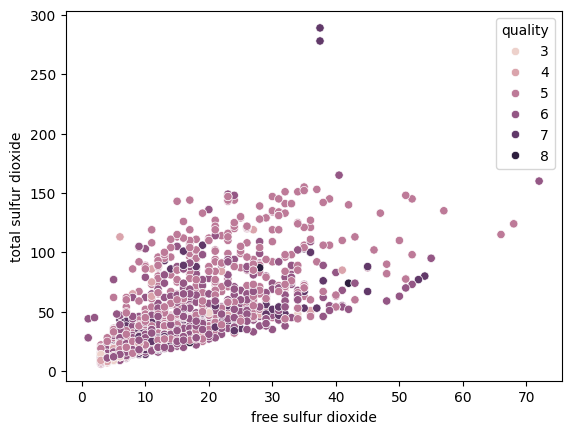

In [47]:
sns.scatterplot(data=df[['free sulfur dioxide', 'total sulfur dioxide', 'quality']], x='free sulfur dioxide',y= 'total sulfur dioxide', hue='quality')

<Axes: xlabel='citric acid', ylabel='pH'>

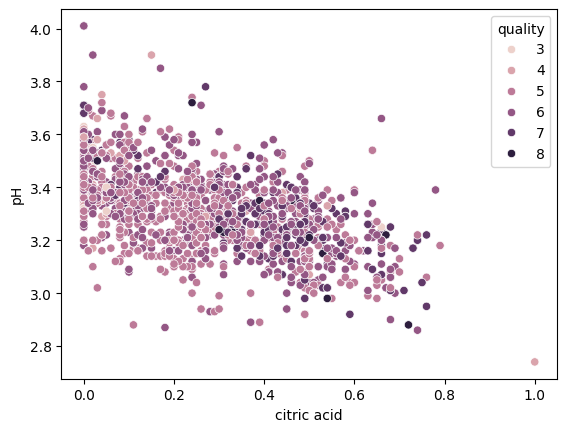

In [48]:
sns.scatterplot(data=df[['citric acid', 'pH', 'quality']], x='citric acid',y= 'pH', hue='quality')

In [49]:
# Nothing obvious in data here for interaction terms, partly because of the number of categories for target.
# Domain knowledge would have been kore helpful here

Build base model as reference point

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['quality'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [64]:
# Eval
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, pred)

0.659375

<Axes: >

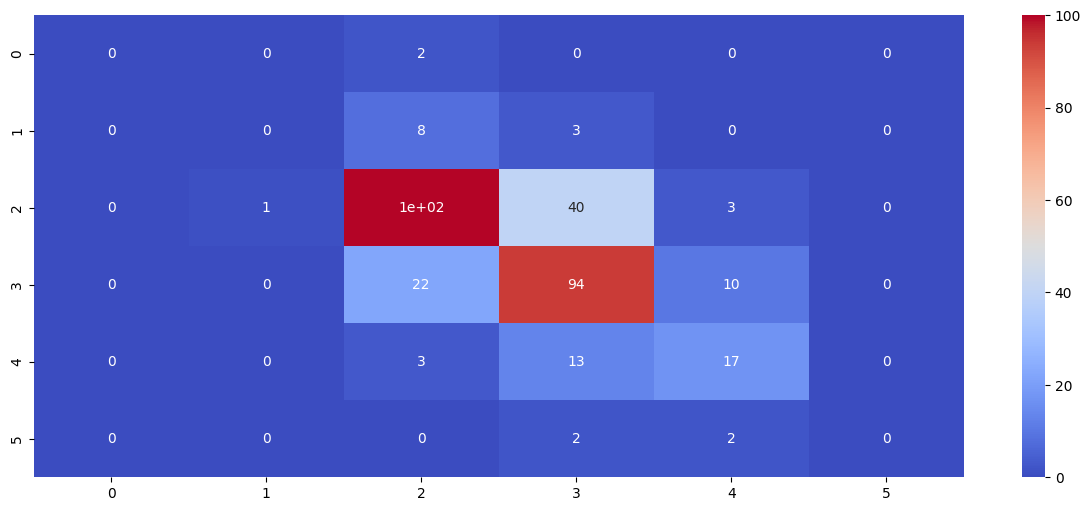

In [63]:
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='coolwarm')

In [66]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.69      0.72       144
           6       0.62      0.75      0.68       126
           7       0.53      0.52      0.52        33
           8       0.00      0.00      0.00         4

    accuracy                           0.66       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.63      0.66      0.64       320



/Users/rohan/Library/Mobile Documents/com~apple~CloudDocs/Test/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rohan/Library/Mobile Documents/com~apple~CloudDocs/Test/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rohan/Library/Mobile Documents/com~apple~CloudDocs/Test/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Optimised model and evaluation

In [67]:
def evaluation(df):
    X = df.drop(['quality'], axis=1)
    y = df['quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    return accuracy_score(y_test, pred)

In [50]:
'''
To consider:
- First watch video as refresh: 
- To feature engineer anything above 0.6 - fixed acidity vs pH and density - remove redunancy (RF less sensitive to multicolinearity)
- Consider capping extreme outliars (although RF pretty robust)
- Residual sugars and Chloride log transformation
- Do feature importance check
- Transformations of certain features may help (RF robust due to partioning); will check will optimised model comparison
- Hyperparamter tuning
- Model eval (Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix) - understand all of them
- If time: Can look into PDPs
- See the code on Kaggle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data)

'''

'\nTo consider:\n- To feature engineer anything above 0.6 - fixed acidity vs pH and density - remove redunancy (RF less sensitive to multicolinearity)\n- Consider capping extreme outliars (although RF pretty robust)\n- Residual sugars and Chloride log transformation\n- Do feature importance check\n- Transformations of certain features may help (RF robust due to partioning); will check will optimised model comparison\n- Hyperparamter tuning\n- Model eval (Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix) - understand all of them\n- If time: Can look into PDPs\n- See the code on Kaggle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data)\n\nfrom scipy import stats\ndata = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]\n'

In [70]:
df1 = df.copy()
df1['fa/pH'] = df['fixed acidity']/df['pH']
df1.drop(columns=['fixed acidity', 'pH'], inplace=True)

In [71]:
df1.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,fa/pH
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,2.108262
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5,2.437500
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5,2.392638
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6,3.544304
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5,2.108262


In [73]:
evaluation(df1)
# Slightly higher after feature engineering this

0.7

In [76]:
# Adding an interaction term with density. Rationale is not any clear connection so seems better than dividing/multiplying

df1['fa*density'] = df['fixed acidity']*df['density']
evaluation(df1)

0.70625

In [77]:
# Very slightly improved

In [82]:
df1[['residual sugar', 'chlorides']] = np.log(df1[['residual sugar', 'chlorides']])

In [83]:
evaluation(df1)

0.66875

In [84]:
df1[['residual sugar', 'chlorides']] = df[['residual sugar', 'chlorides']]
# Accuracy worsened when log transformed so reverted back

In [85]:
# Feature importance, outliars, hyperparameter tuning

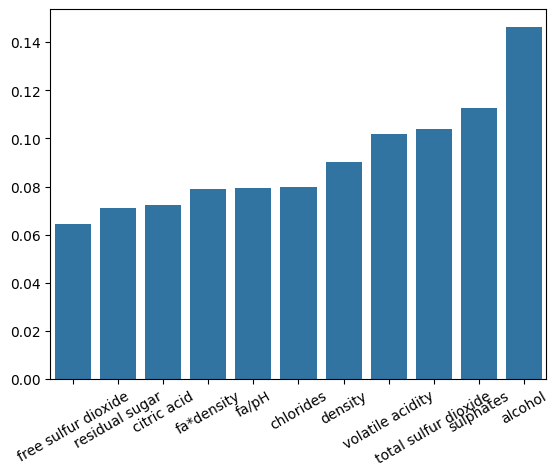

In [126]:
# Feature importance
X = df1.drop('quality', axis=1)
y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf1 = RandomForestClassifier()
rf1.fit(X,y)

feature_importance = pd.Series(rf1.feature_importances_, index=X.columns)
sns.barplot(feature_importance.sort_values())
plt.xticks(rotation=30)
plt.show()

In [90]:
# All features seem fine in terms of importance

In [92]:
# Outliers of more than 3 std away 

z_scores = np.abs((df1['residual sugar']-df1['residual sugar'].mean())/df1['residual sugar'].std())
(z_scores > 3).sum()

30

In [109]:
df1 = df1[(z_scores<3)]

z_scores1 = np.abs((df1['chlorides']-df1['chlorides'].mean())/df1['chlorides'].std())
(z_scores1 > 3).sum()

31

In [110]:
df1 = df1[(z_scores1<3)]

In [111]:
df1.shape

(1538, 12)

In [112]:
evaluation(df1)

0.672077922077922

In [113]:
# Accuracy has worsened again when attempting to remove outliers, so not as effective as expected 

In [115]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth' : [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf2 = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-val score: {grid_search.best_score_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, 

/Users/rohan/Library/Mobile Documents/com~apple~CloudDocs/Test/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
198 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rohan/Library/Mobile Documents/com~apple~CloudDocs/Test/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rohan/Library/Mobile Documents/com~apple~CloudDocs/Test/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/ro

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best cross-val score: 0.6865196078431373


In [127]:
# Best parameters might have resulted in overfit given highest depth and lower samples
# Will check training and test accuracy to confirm

rf4 = RandomForestClassifier(max_depth = 15, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 250)
rf4.fit(X_train, y_train)

predict_y = rf4.predict(X_train)
pred_y = rf4.predict(X_test)

print(f'Training accuracy score: {accuracy_score(y_train, predict_y)}')
print(f'Test accuracy score: {accuracy_score(y_test, pred_y)}')

Training accuracy score: 0.9747967479674797
Test accuracy score: 0.7272727272727273


In [125]:
# Clear sign of overfitting! 

In [128]:
rf5 = RandomForestClassifier()
rf5.fit(X_train, y_train)

predict_y = rf5.predict(X_train)
pred_y = rf5.predict(X_test)

print(f'Training accuracy score: {accuracy_score(y_train, predict_y)}')
print(f'Test accuracy score: {accuracy_score(y_test, pred_y)}')

Training accuracy score: 1.0
Test accuracy score: 0.7207792207792207


In [132]:
# Testing to see if can reduce overfitting
rf6 = RandomForestClassifier(min_samples_leaf = 3, min_samples_split = 3)
rf6.fit(X_train, y_train)

predict_y = rf6.predict(X_train)
pred_y = rf6.predict(X_test)

print(f'Training accuracy score: {accuracy_score(y_train, predict_y)}')
print(f'Test accuracy score: {accuracy_score(y_test, pred_y)}')


Training accuracy score: 0.9113821138211382
Test accuracy score: 0.7012987012987013


In [136]:
'''
Note: Was able to imporve test accuracy from 0.65 to slightly above 0.7.
However, there seems to be signs of overfitting with large difference in training and test accuracy.
Transformations on some heavily skewed variables and removing outliers seems to reduce accuracy (part of learning data)
Could try to finetune further to find perfect bias-variance issue
Could also have looked more into cross_val_scores to confirm overfitting and evaluate model performance
(eg. rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean())
'''

'\nNote: Was able to imporve test accuracy from 0.65 to slightly above 0.7.\nHowever, there seems to be signs of overfitting with large difference in training and test accuracy.\nTransformations on some heavily skewed variables and removing outliers seems to reduce accuracy (part of learning data)\nCould try to finetune further to find perfect bias-variance issue\nCould also have looked more into cross_val_scores to confirm overfitting and evaluate model performance\n(eg. rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)\nrfc_eval.mean())\n'